In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import TargetEncoder
import numpy as np

In [11]:
spotify = pd.read_csv('../data/Spotify dataset export 2025-02-10 09-00-03.csv')

In [12]:
spotify.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,True,True,1040234854,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,True,True,310083733,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,True,True,63063467,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,True,True,434663559,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,True,True,617259738,9.942693,Youtube


In [13]:
spotify.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_min', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'EnergyLiveness', 'most_playedon'],
      dtype='object')

In [18]:
#Scaling the data to make it easier to work with
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
				  'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_min', 
				  'Views', 'Likes', 'Comments', 'Stream', 'EnergyLiveness']
spotify_scaled = scaler.fit_transform(spotify[numeric_columns])
spotify_scaled = pd.DataFrame(spotify_scaled, columns=numeric_columns)

spotify_scaled.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
0,1.195758,0.325870,0.215386,0.715524,-0.989238,-0.278033,2.483870,0.985284,0.608245,-0.015237,2.206628,3.142135,0.748338,3.744920,-0.975518
1,0.337753,0.316536,0.401618,-0.593096,-0.714728,-0.286519,-0.872801,1.311101,-0.939645,-0.194816,-0.073463,0.243086,0.021741,0.732154,2.432785
2,0.452557,1.343283,0.807923,-0.396981,-0.869913,-0.047836,-0.459955,0.085214,-0.424121,-0.075105,-0.306690,-0.206274,-0.101730,-0.287107,0.677646
3,0.416303,0.484549,0.402696,-0.630536,-1.018405,2.338837,-0.767961,0.195177,-0.004719,0.074500,0.439176,0.643090,0.148465,1.246198,1.549541
4,0.259203,0.274533,-0.204499,0.662038,-0.930030,-0.290067,-0.733606,-0.020677,1.601710,0.930174,1.931223,3.128841,0.675226,1.999630,1.159935


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Distribution of predictors with outliers')

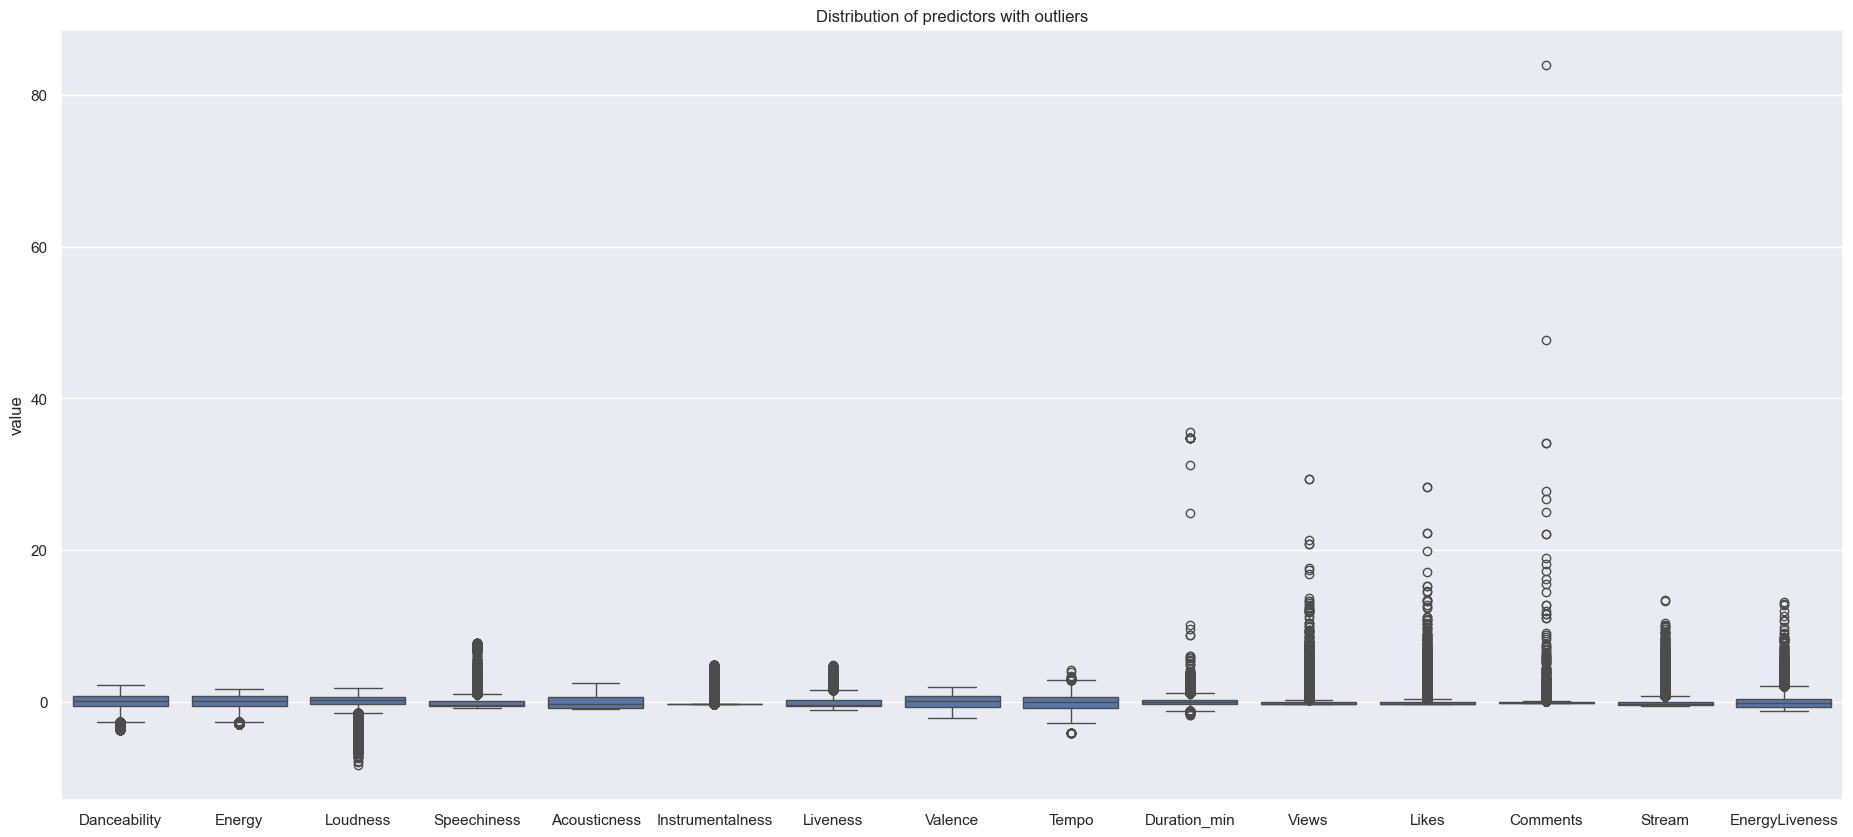

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
#box plot with outliers
df_melt=pd.melt(spotify_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xlabel(None)
plt.title('Distribution of predictors with outliers')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Distribution of predictors without outliers')

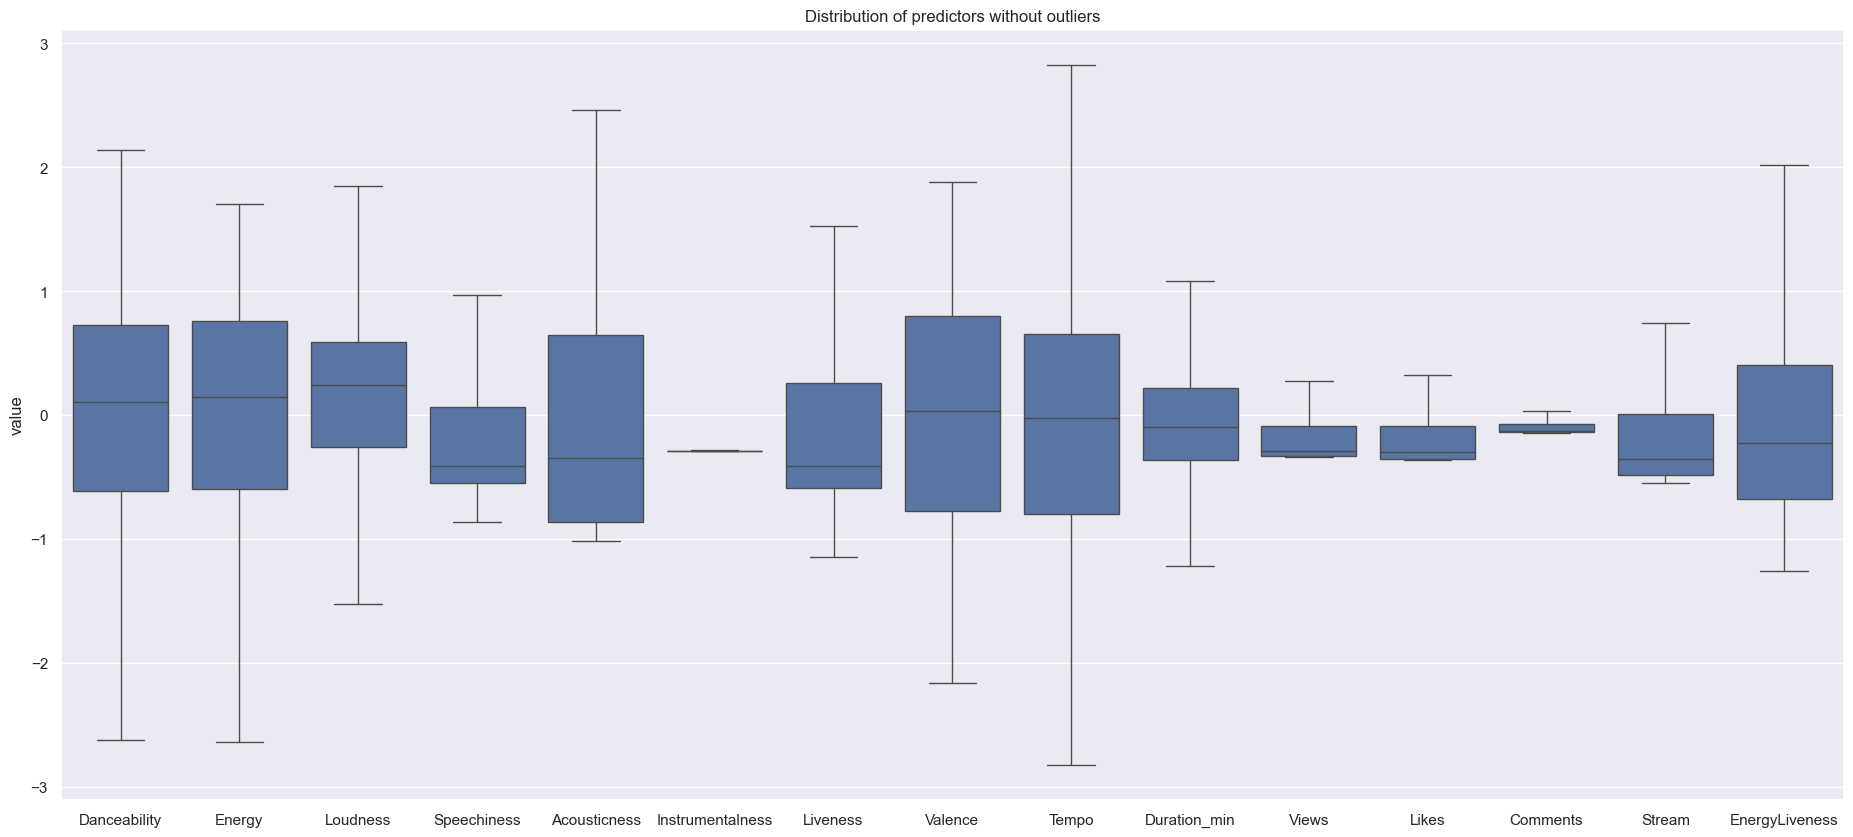

In [20]:
#boxplot without outliers
df_melt=pd.melt(spotify_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
plt.xlabel(None)
plt.title('Distribution of predictors without outliers')

In [21]:

df_clean=spotify_scaled.copy()
for col in df_clean.columns:
  q1=df_clean[col].quantile(0.25)
  q3=df_clean[col].quantile(0.75)
  inq=q3-q1
  filter=(df_clean[col] >= q1-1.5*inq) & (df_clean[col] <= q3+1.5*inq)
  df_clean[col] = df_clean[col].loc[filter]

In [26]:
#merge the cleaned data with the categorical columns
spotify_cleaned = pd.concat([df_clean, spotify[['Album_type', 'Artist', 'Title','Album']]], axis=1)
spotify_cleaned.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness,Album_type,Artist,Title,Album
0,1.195758,0.325870,0.215386,0.715524,-0.989238,NaN,NaN,0.985284,0.608245,-0.015237,NaN,NaN,NaN,NaN,-0.975518,album,Gorillaz,Gorillaz - Feel Good Inc. (Official Video),Demon Days
1,0.337753,0.316536,0.401618,-0.593096,-0.714728,-0.286519,-0.872801,1.311101,-0.939645,-0.194816,-0.073463,0.243086,0.021741,0.732154,NaN,album,Gorillaz,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Plastic Beach
2,0.452557,1.343283,0.807923,-0.396981,-0.869913,NaN,-0.459955,0.085214,-0.424121,-0.075105,-0.306690,-0.206274,-0.101730,-0.287107,0.677646,single,Gorillaz,Gorillaz - New Gold ft. Tame Impala & Bootie B...,New Gold (feat. Tame Impala and Bootie Brown)
3,0.416303,0.484549,0.402696,-0.630536,-1.018405,NaN,-0.767961,0.195177,-0.004719,0.074500,NaN,NaN,NaN,NaN,1.549541,album,Gorillaz,Gorillaz - On Melancholy Hill (Official Video),Plastic Beach
4,0.259203,0.274533,-0.204499,0.662038,-0.930030,-0.290067,-0.733606,-0.020677,1.601710,0.930174,NaN,NaN,NaN,NaN,1.159935,album,Gorillaz,Gorillaz - Clint Eastwood (Official Video),Gorillaz


In [31]:
X = spotify_cleaned.drop(columns=['Stream','Views','Likes','Comments'])
X.fillna(0, inplace=True)
y = np.log1p(spotify_cleaned['Stream'])
y = y.fillna(0)


In [ ]:
transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Album_type', 'Artist']),
    ('text_title', TfidfVectorizer(stop_words='english', max_features=100), 'Title'),
    ('text_album', TfidfVectorizer(stop_words='english', max_features=100), 'Album')
])

pipeline = make_pipeline(transformer, 
                         RandomForestRegressor(n_estimators=100, random_state=42))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

In [16]:
np.expm1(mean_squared_error(y_test, y_pred))

1484.8620149103576

In [ ]:
X